In [1]:
import numpy as np
import pandas as pd

### Loading Data

In [3]:
path = 'E:\\ML\\Datasets'
data_1617 = pd.read_csv(f'{path}\\2016_2017.csv', sep=',')
data_1718 = pd.read_csv(f'{path}\\2017_2018.csv', sep=',')

In [10]:
data_1718.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 'HY',
       'AY', 'HR', 'AR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH',
       'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD',
       'WHA', 'VCH', 'VCD', 'VCA', 'Bb1X2', 'BbMxH', 'BbAvH', 'BbMxD', 'BbAvD',
       'BbMxA', 'BbAvA', 'BbOU', 'BbMx>2.5', 'BbAv>2.5', 'BbMx<2.5',
       'BbAv<2.5', 'BbAH', 'BbAHh', 'BbMxAHH', 'BbAvAHH', 'BbMxAHA', 'BbAvAHA',
       'PSCH', 'PSCD', 'PSCA'],
      dtype='object')

In [14]:
def one_team_centric(team_name, dataset):
    result = dataset[(dataset['HomeTeam'] == team_name) | (dataset['AwayTeam'] == team_name)].reset_index(drop=True)
    cols = list(result.columns)
    cols = cols[:22]
    result = result[cols]
    for i in range(result.shape[0]):
        if result.loc[i, 'HomeTeam'] == team_name:     
            result.loc[i, 'where'] = 'home'  
        else:      
            result.loc[i, 'where'] = 'away'
        if result.loc[i, 'where'] == 'away' and result.loc[i,'FTR'] == 'A':
            result.loc[i, 'result'] = 1
        elif result.loc[i, 'where'] == 'home' and result.loc[i,'FTR'] == 'H':
            result.loc[i, 'result'] = 1
        elif result.loc[i,'FTR'] == 'D':
            result.loc[i, 'result'] = 2
        else:
            result.loc[i, 'result'] = 0
        
        if result.loc[i, 'where'] == 'away' and result.loc[i,'HTR'] == 'A':
            result.loc[i, 'ht_result'] = 1
        elif result.loc[i, 'where'] == 'home' and result.loc[i,'HTR'] == 'H':
            result.loc[i, 'ht_result'] = 1
        elif result.loc[i,'HTR'] == 'D':
            result.loc[i, 'ht_result'] = 2
        else:
            result.loc[i, 'ht_result'] = 0
        result.loc[i, 'total_fouls'] = result.loc[i, 'HF'] + result.loc[i, 'AF']
        result.loc[i, 'total_yc'] = result.loc[i, 'HY'] + result.loc[i, 'AY']
        if result.loc[i, 'where'] == 'away':
            result.loc[i, 'vs'] = result.loc[i, 'HomeTeam']
            result.loc[i, 'rm_shots'] = result.loc[i, 'AS']
            result.loc[i, 'rm_shots_ratio'] = result.loc[i, 'AST']/result.loc[i, 'AS']
            result.loc[i, 'vs_shots'] = result.loc[i, 'HS']
            result.loc[i, 'vs_shots_ratio'] = result.loc[i, 'HST']/result.loc[i, 'HS']
            result.loc[i, 'pct_fouls'] = result.loc[i, 'AF']/result.loc[i, 'total_fouls']
            result.loc[i, 'rm_corners'] = result.loc[i, 'AC']
            result.loc[i, 'vs_corners'] = result.loc[i, 'HC']
            result.loc[i, 'pct_yc'] = result.loc[i, 'AY']/result.loc[i, 'total_yc']
            result.loc[i, 'rm_rc'] = result.loc[i, 'AR']
            result.loc[i, 'vs_rc'] = result.loc[i, 'HR']
        else:
            result.loc[i, 'vs'] = result.loc[i, 'AwayTeam']
            result.loc[i, 'rm_shots'] = result.loc[i, 'HS']
            result.loc[i, 'rm_shots_ratio'] = result.loc[i, 'HST']/result.loc[i, 'HS']
            result.loc[i, 'vs_shots'] = result.loc[i, 'AS']
            result.loc[i, 'vs_shots_ratio'] = result.loc[i, 'AST']/result.loc[i, 'AS']
            result.loc[i, 'pct_fouls'] = result.loc[i, 'HF']/result.loc[i, 'total_fouls']
            result.loc[i, 'rm_corners'] = result.loc[i, 'HC']
            result.loc[i, 'vs_corners'] = result.loc[i, 'AC']
            result.loc[i, 'pct_yc'] = result.loc[i, 'HY']/result.loc[i, 'total_yc']
            result.loc[i, 'rm_rc'] = result.loc[i, 'HR']
            result.loc[i, 'vs_rc'] = result.loc[i, 'AR']
        

    result = result.drop(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG', 'HTR',
                         'HS', 'AS', 'AST', 'HST', 'HF', 'AF', 'HC', 'AC', 'HR', 'AR', 'HY', 'AY'], axis=1)
    #'where' = 1 home, 0 away
    # 1 - stands for win
    # 0 - stands for lose
    # 2 -stands for draw
    result['where'] = np.where(result['where']=='home', 1, 0)
    teams = result['vs']
    result = result.drop('vs', axis=1)
    targets = result['result']
    result = result.drop('result', axis=1)
    return result, teams, targets

In [15]:
rm_1718, vs_1718, res_1718 = one_team_centric('Real Madrid', dataset=data_1718)

In [16]:
rm_1718.head()

,where,ht_result,total_fouls,total_yc,rm_shots,rm_shots_ratio,vs_shots,vs_shots_ratio,pct_fouls,rm_corners,vs_corners,pct_yc,rm_rc,vs_rc
0,0,1.0,28.0,6.0,16.0,0.500000,12.0,0.500000,0.428571,4.0,4.0,0.166667,1.0,0.0
1,1,2.0,24.0,8.0,22.0,0.272727,7.0,0.428571,0.500000,13.0,4.0,0.375000,0.0,0.0
2,1,2.0,25.0,5.0,18.0,0.555556,5.0,0.400000,0.360000,13.0,3.0,0.400000,1.0,0.0
3,0,1.0,27.0,5.0,18.0,0.333333,10.0,0.500000,0.555556,6.0,4.0,0.400000,0.0,0.0
4,1,2.0,24.0,3.0,27.0,0.259259,12.0,0.333333,0.541667,12.0,3.0,0.000000,0.0,0.0


In [19]:
rm_1718['where'] = np.where(rm_1718['where'] == 0, -1, rm_1718['where'])
rm_1718['rm_rc'] = np.where(rm_1718['rm_rc'] == 0, -1, rm_1718['rm_rc'])
rm_1718['vs_rc'] = np.where(rm_1718['vs_rc'] == 0, -1, rm_1718['vs_rc'])
rm_1718 = rm_1718.drop('ht_result', axis=1)

In [20]:
rm_1718.head()

,where,total_fouls,total_yc,rm_shots,rm_shots_ratio,vs_shots,vs_shots_ratio,pct_fouls,rm_corners,vs_corners,pct_yc,rm_rc,vs_rc
0,-1,28.0,6.0,16.0,0.500000,12.0,0.500000,0.428571,4.0,4.0,0.166667,1.0,-1.0
1,1,24.0,8.0,22.0,0.272727,7.0,0.428571,0.500000,13.0,4.0,0.375000,-1.0,-1.0
2,1,25.0,5.0,18.0,0.555556,5.0,0.400000,0.360000,13.0,3.0,0.400000,1.0,-1.0
3,-1,27.0,5.0,18.0,0.333333,10.0,0.500000,0.555556,6.0,4.0,0.400000,-1.0,-1.0
4,1,24.0,3.0,27.0,0.259259,12.0,0.333333,0.541667,12.0,3.0,0.000000,-1.0,-1.0


In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(rm_1718)
rm_scaled_1718 = pd.DataFrame(scaler.transform(rm_1718), columns=rm_1718.columns)

In [26]:
rm_scaled_1718.head(10)

,where,total_fouls,total_yc,rm_shots,rm_shots_ratio,vs_shots,vs_shots_ratio,pct_fouls,rm_corners,vs_corners,pct_yc,rm_rc,vs_rc
0,0.0,0.481481,0.714286,0.222222,0.536585,0.555556,0.416667,0.419355,0.076923,0.500,0.233333,1.0,0.0
1,1.0,0.333333,1.000000,0.555556,0.115299,0.277778,0.333333,0.564516,0.769231,0.500,0.525000,0.0,0.0
2,1.0,0.370370,0.571429,0.333333,0.639566,0.166667,0.300000,0.280000,0.769231,0.375,0.560000,1.0,0.0
3,0.0,0.444444,0.571429,0.333333,0.227642,0.444444,0.416667,0.677419,0.230769,0.500,0.560000,0.0,0.0
4,1.0,0.333333,0.285714,0.833333,0.090334,0.555556,0.222222,0.649194,0.692308,0.375,0.000000,0.0,0.0
5,0.0,0.851852,0.857143,0.500000,0.227642,0.333333,0.270833,0.564516,0.769231,0.625,0.400000,0.0,0.0
6,1.0,0.111111,0.428571,0.555556,0.283814,0.333333,0.270833,0.451613,0.538462,0.375,0.700000,0.0,0.0
7,0.0,0.592593,0.571429,0.222222,0.304878,0.333333,0.270833,0.072841,0.307692,0.500,0.840000,0.0,0.0
8,1.0,0.037037,0.142857,0.166667,0.474797,0.388889,0.092593,0.691532,0.153846,0.250,0.700000,0.0,0.0
9,0.0,0.629630,0.285714,0.166667,0.351220,0.722222,0.144444,0.246976,0.307692,0.250,0.466667,0.0,0.0


In [27]:
from sklearn.decomposition import PCA
pca = PCA().fit(rm_scaled_1718)

In [28]:
pca.explained_variance_ratio_[:4]

array([0.33295068, 0.15140622, 0.10724369, 0.09303772])

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

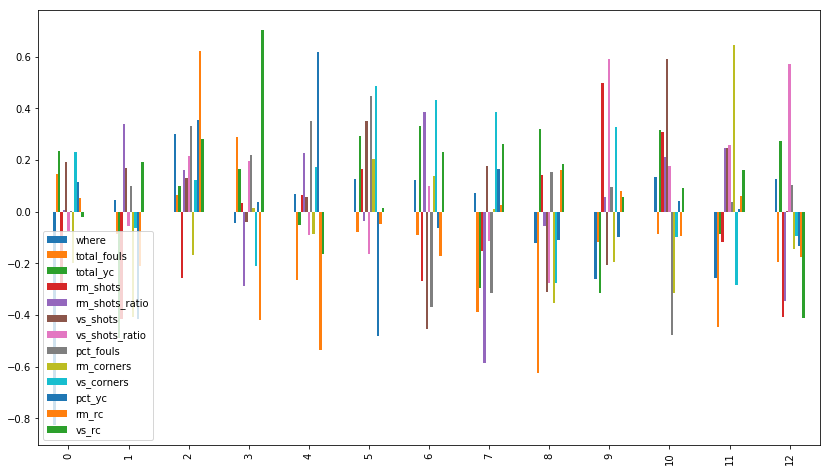

In [31]:
#Getting results of PCA
result = pd.DataFrame(np.round(pca.components_, 4), columns = rm_1718.columns)
fig, ax = plt.subplots(figsize = (14,8))
result.plot(ax=ax, kind='bar')

In [45]:
pca4 = PCA(random_state=0, n_components=4)
pca4.fit(rm_scaled_1718)
reduced_rm_1718 = pd.DataFrame(pca4.transform(rm_scaled_1718), columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_samples = pca4.transform(rm_scaled_1718.loc[[4, 20, 28], :])

In [34]:
reduced_rm_1718.head()

,PC1,PC2,PC3,PC4
0,0.613033,-0.030412,0.448944,-0.403560
1,-0.471933,-0.611080,-0.026087,0.153133
2,-0.491164,-0.398670,0.577663,-0.519848
3,0.473910,-0.087955,-0.104822,0.148570
4,-0.734328,-0.067746,-0.319872,0.043885


In [46]:
from sklearn.cluster import KMeans
cltr = KMeans(n_clusters = 3, random_state = 0)
cltr.fit(reduced_rm_1718)
preds = cltr.predict(reduced_rm_1718)
centers = cltr.cluster_centers_

In [41]:
def cluster_results(reduced_data, preds, centers, pca_samples):

    predictions = pd.DataFrame(preds, columns = ['Cluster'])
    plot_data = pd.concat([predictions, reduced_data], axis = 1)
    fig, ax = plt.subplots(figsize = (14,8))

    cmap = cm.get_cmap('gist_rainbow')

    for i, cluster in plot_data.groupby('Cluster'):   
        cluster.plot(ax = ax, kind = 'scatter', x = 'PC1', y = 'PC2', \
                     color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

    for i, c in enumerate(centers):
        ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
                   alpha = 1, linewidth = 2, marker = 'o', s=200);
        ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

    ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
               s = 150, linewidth = 4, color = 'black', marker = 'x');
    ax.set_title("Cluster");

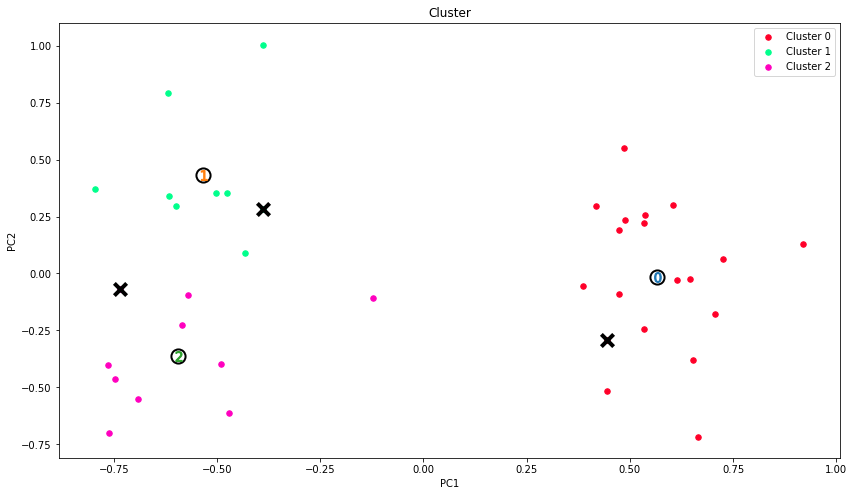

In [47]:
cluster_results(reduced_rm_1718, preds, centers, pca_samples)

In [48]:
pca_samples

array([[-0.73432814, -0.06774556, -0.3198725 ,  0.04388517],
       [ 0.44494035, -0.29009369, -0.28585207, -0.05047258],
       [-0.38738064,  0.28258013,  0.24633259, -0.22940552]])

In [51]:
print(f'{preds[4]}, {preds[20]}, {preds[28]}')

2, 0, 1


In [59]:
predictions = []
real = []
for p in preds:
    if p == 1:
        temp = 'win'
    elif p == 0:
        temp = 'draw'
    else:
        temp = 'lose'
    predictions.append(temp)

In [61]:
for r in res_1718.values:
    if r == 1.0:
        t = 'win'
    elif r == 2.0:
        t = 'draw'
    else:
        t = 'lose'
    real.append(t)

In [62]:
predictions

['draw',
 'lose',
 'lose',
 'draw',
 'lose',
 'draw',
 'lose',
 'draw',
 'win',
 'draw',
 'lose',
 'draw',
 'win',
 'draw',
 'win',
 'lose',
 'draw',
 'lose',
 'win',
 'draw',
 'draw',
 'win',
 'draw',
 'draw',
 'lose',
 'draw',
 'win',
 'draw',
 'win',
 'draw',
 'lose',
 'draw',
 'lose',
 'win',
 'draw',
 'draw',
 'win',
 'draw']

In [63]:
real

['win',
 'draw',
 'draw',
 'win',
 'lose',
 'win',
 'win',
 'win',
 'win',
 'lose',
 'win',
 'draw',
 'win',
 'draw',
 'win',
 'lose',
 'draw',
 'lose',
 'win',
 'win',
 'draw',
 'win',
 'win',
 'win',
 'win',
 'lose',
 'win',
 'win',
 'win',
 'win',
 'draw',
 'win',
 'draw',
 'win',
 'draw',
 'lose',
 'win',
 'draw']